In [232]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats   # Hypothesis test 

In [235]:
df=pd.read_csv("Car_sales.csv")  # reading data fron CSV format

In [236]:
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [237]:
df.tail()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [238]:
df.shape # rows and columns

(157, 16)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

# Preprocessing 
* EDA-Exploratory Data Analysis
    * Univariate 
        * Cat 
        * Num
    * Bivariate 
        * Cat - Cat
        * Cat - Num or Num - Cat
        * Num - Num
* Feature **Engineering**
    * Missing
    * Outlier 
    * Rescaling
    * Convert non numerical to numerical
    * New Variable/Feature creation
    * Transform

# One

## Two 

### Three 

#### four

##### five 

~i hate you~

### `Univariate` Analysis

In [248]:
# df.dtypes 
# ["Manufacturer", "Model","Vehicle_type", 'Latest_Launch']
df.dtypes[df.dtypes=="object"].index.to_list()

['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']

In [249]:
df.select_dtypes(include=["object"]).columns.to_list()

['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']

In [250]:
df["Manufacturer"].nunique()  # this gives the count of unique objects

30

In [251]:
df["Manufacturer"].unique()  # unique object names

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [252]:
df["Manufacturer"].value_counts()  # Freq counts

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

In [253]:
df["Manufacturer"].value_counts(dropna=False)  # freq dist along with missing value 

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

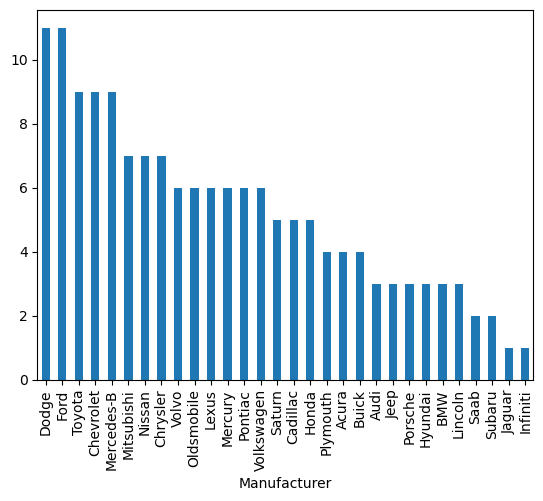

In [254]:
df["Manufacturer"].value_counts(dropna=False).plot(kind="bar")

In [255]:
2/157

0.012738853503184714

In [256]:
df.drop(columns=["Manufacturer"], inplace=True)

In [257]:
df["Model"].nunique()

156

In [258]:
df["Model"].unique()

array(['Integra', 'TL', 'CL', 'RL', 'A4', 'A6', 'A8', '323i', '328i',
       '528i', 'Century', 'Regal', 'Park Avenue', 'LeSabre', 'DeVille',
       'Seville', 'Eldorado', 'Catera', 'Escalade', 'Cavalier', 'Malibu',
       'Lumina', 'Monte Carlo', 'Camaro', 'Corvette', 'Prizm', 'Metro',
       'Impala', 'Sebring Coupe', 'Sebring Conv.', 'Concorde', 'Cirrus',
       'LHS', 'Town & Country', '300M', 'Neon', 'Avenger', 'Stratus',
       'Intrepid', 'Viper', 'Ram Pickup', 'Ram Wagon', 'Ram Van',
       'Dakota', 'Durango', 'Caravan', 'Escort', 'Mustang', 'Contour',
       'Taurus', 'Focus', 'Crown Victoria', 'Explorer', 'Windstar',
       'Expedition', 'Ranger', 'F-Series', 'Civic', 'Accord', 'CR-V',
       'Passport', 'Odyssey', 'Accent', 'Elantra', 'Sonata', 'I30',
       'S-Type', 'Wrangler', 'Cherokee', 'Grand Cherokee', 'ES300',
       'GS300', 'GS400', 'LS400', 'LX470', 'RX300', 'Continental',
       'Town car', 'Navigator', 'Mirage', 'Eclipse', 'Galant', 'Diamante',
       '3000GT',

In [259]:
df["Model"].value_counts()

Model
Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: count, Length: 156, dtype: int64

In [260]:
df.drop(columns=["Model"], inplace=True)

In [261]:
df["Latest_Launch"].value_counts()  
# this column is date but it is stored as object.
# we need to convert it into date

Latest_Launch
10/5/2012     2
1/24/2011     2
4/26/2011     2
6/25/2011     2
9/21/2011     2
             ..
8/7/2011      1
6/2/2012      1
10/31/2011    1
7/1/2012      1
10/20/2011    1
Name: count, Length: 130, dtype: int64

In [262]:
df["Latest_Launch"]=pd.to_datetime(df["Latest_Launch"])  # converting object to Datetime :type casting 

In [263]:
df["Latest_Launch"].dtypes

dtype('<M8[ns]')

In [264]:
df["Latest_Launch"]

0     2012-02-02
1     2011-06-03
2     2012-01-04
3     2011-03-10
4     2011-10-08
         ...    
152   2011-09-21
153   2012-11-24
154   2011-06-25
155   2011-04-26
156   2011-11-14
Name: Latest_Launch, Length: 157, dtype: datetime64[ns]

In [265]:
df["Vehicle_type"].unique()

array(['Passenger', 'Car'], dtype=object)

In [266]:
df["Vehicle_type"].value_counts(dropna=False)

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [267]:
# Numerical Data
df.select_dtypes(include=["float"]).columns.to_list()

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [268]:
df[['Sales_in_thousands','four_year_resale_value','Price_in_thousands',
 'Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight',
 'Fuel_capacity','Fuel_efficiency',
    'Power_perf_factor']].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,41.250000,43.235000,53.613000,58.548000,60.220000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.775000,5.000000,5.200000,5.380000,5.700000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,78.200000,78.200000,78.735000,78.800000,79.190000,79.900000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.389100,4.457840,4.629440,5.090440,5.396680,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,25.400000,25.880000,26.000000,29.600000,30.900000,32.000000


In [269]:
df["Sales_in_thousands"].skew()  # checking skewness positive skewed data 

3.408518366470572

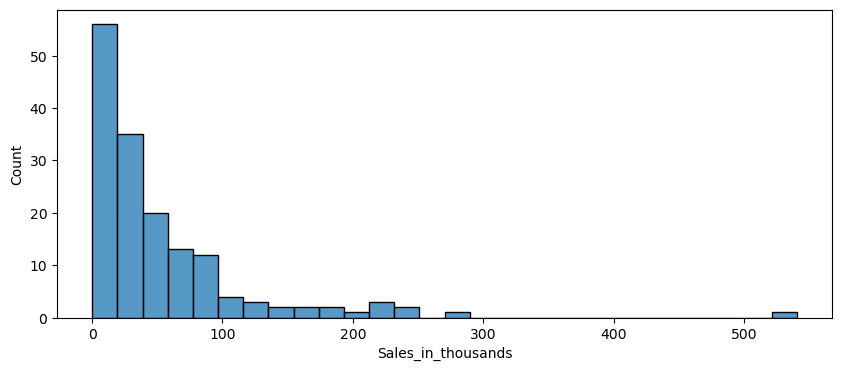

In [270]:
plt.figure(figsize=(10,4))
sns.histplot(df["Sales_in_thousands"])
plt.show()

In [271]:
df["Sales_in_thousands"].kurt() 

17.55734423299965

<Axes: ylabel='Sales_in_thousands'>

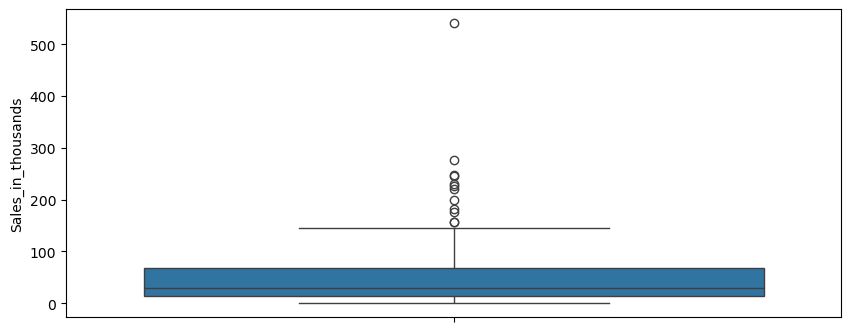

In [272]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, y=df["Sales_in_thousands"])

In [273]:
df["four_year_resale_value"].skew()

2.2949154931263167

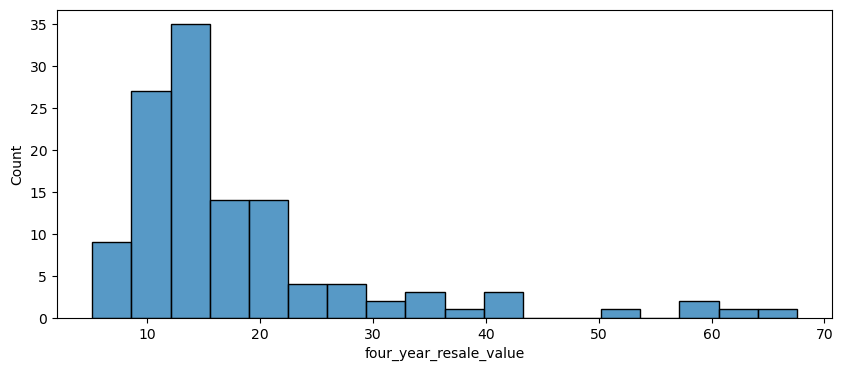

In [274]:
plt.figure(figsize=(10,4))
sns.histplot(df["four_year_resale_value"])
plt.show()

In [275]:
# study for each variable

### Bivariate Analysis

In [277]:
# Cat-Cat
# Cat-Num or Num - cat
# Num - Num

In [278]:
df.groupby("Vehicle_type").agg({"Sales_in_thousands":["min", "mean", "median", "max", "count"]})

Sales_in_thousands                                   
                            min       mean   median      max count
Vehicle_type                                                      
Car                       9.126  80.622293  51.2380  540.561    41
Passenger                 0.110  43.234345  25.4305  247.994   116

<Axes: xlabel='Vehicle_type'>

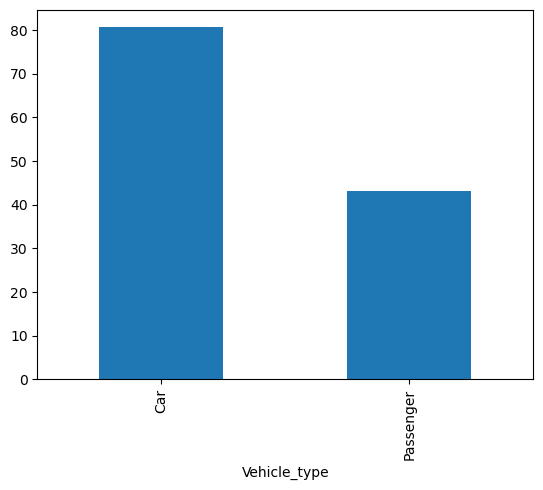

In [279]:
df.groupby("Vehicle_type")["Sales_in_thousands"].mean().plot(kind="bar") 

In [280]:
# Study all numerical variable with vehicle_type -- HW

In [281]:
# Num-Num
df.select_dtypes(include=["float"]).columns.to_list()

['Sales_in_thousands',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

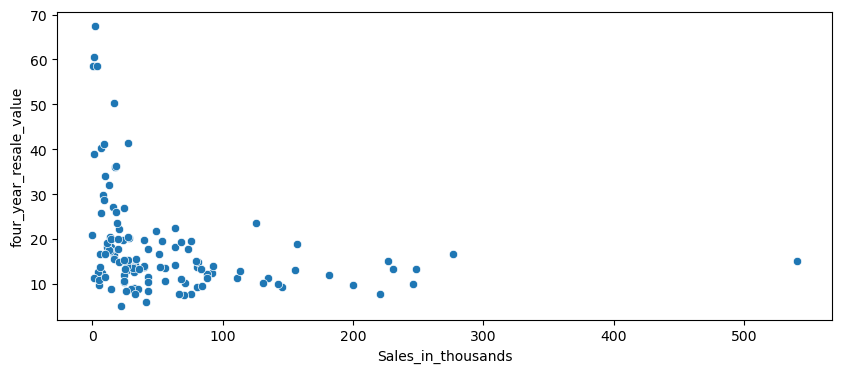

In [282]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x=df["Sales_in_thousands"], y=df["four_year_resale_value"])
plt.show()

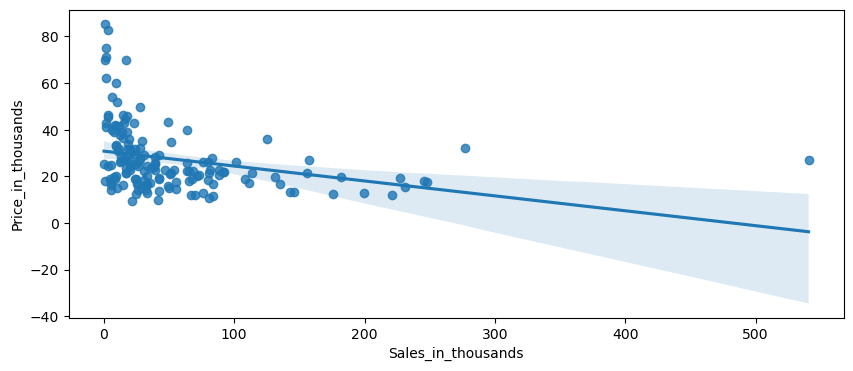

In [283]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x=df["Sales_in_thousands"], y=df["Price_in_thousands"])
plt.show()

In [284]:
s=df[df.select_dtypes(include=["float"]).columns.to_list()]

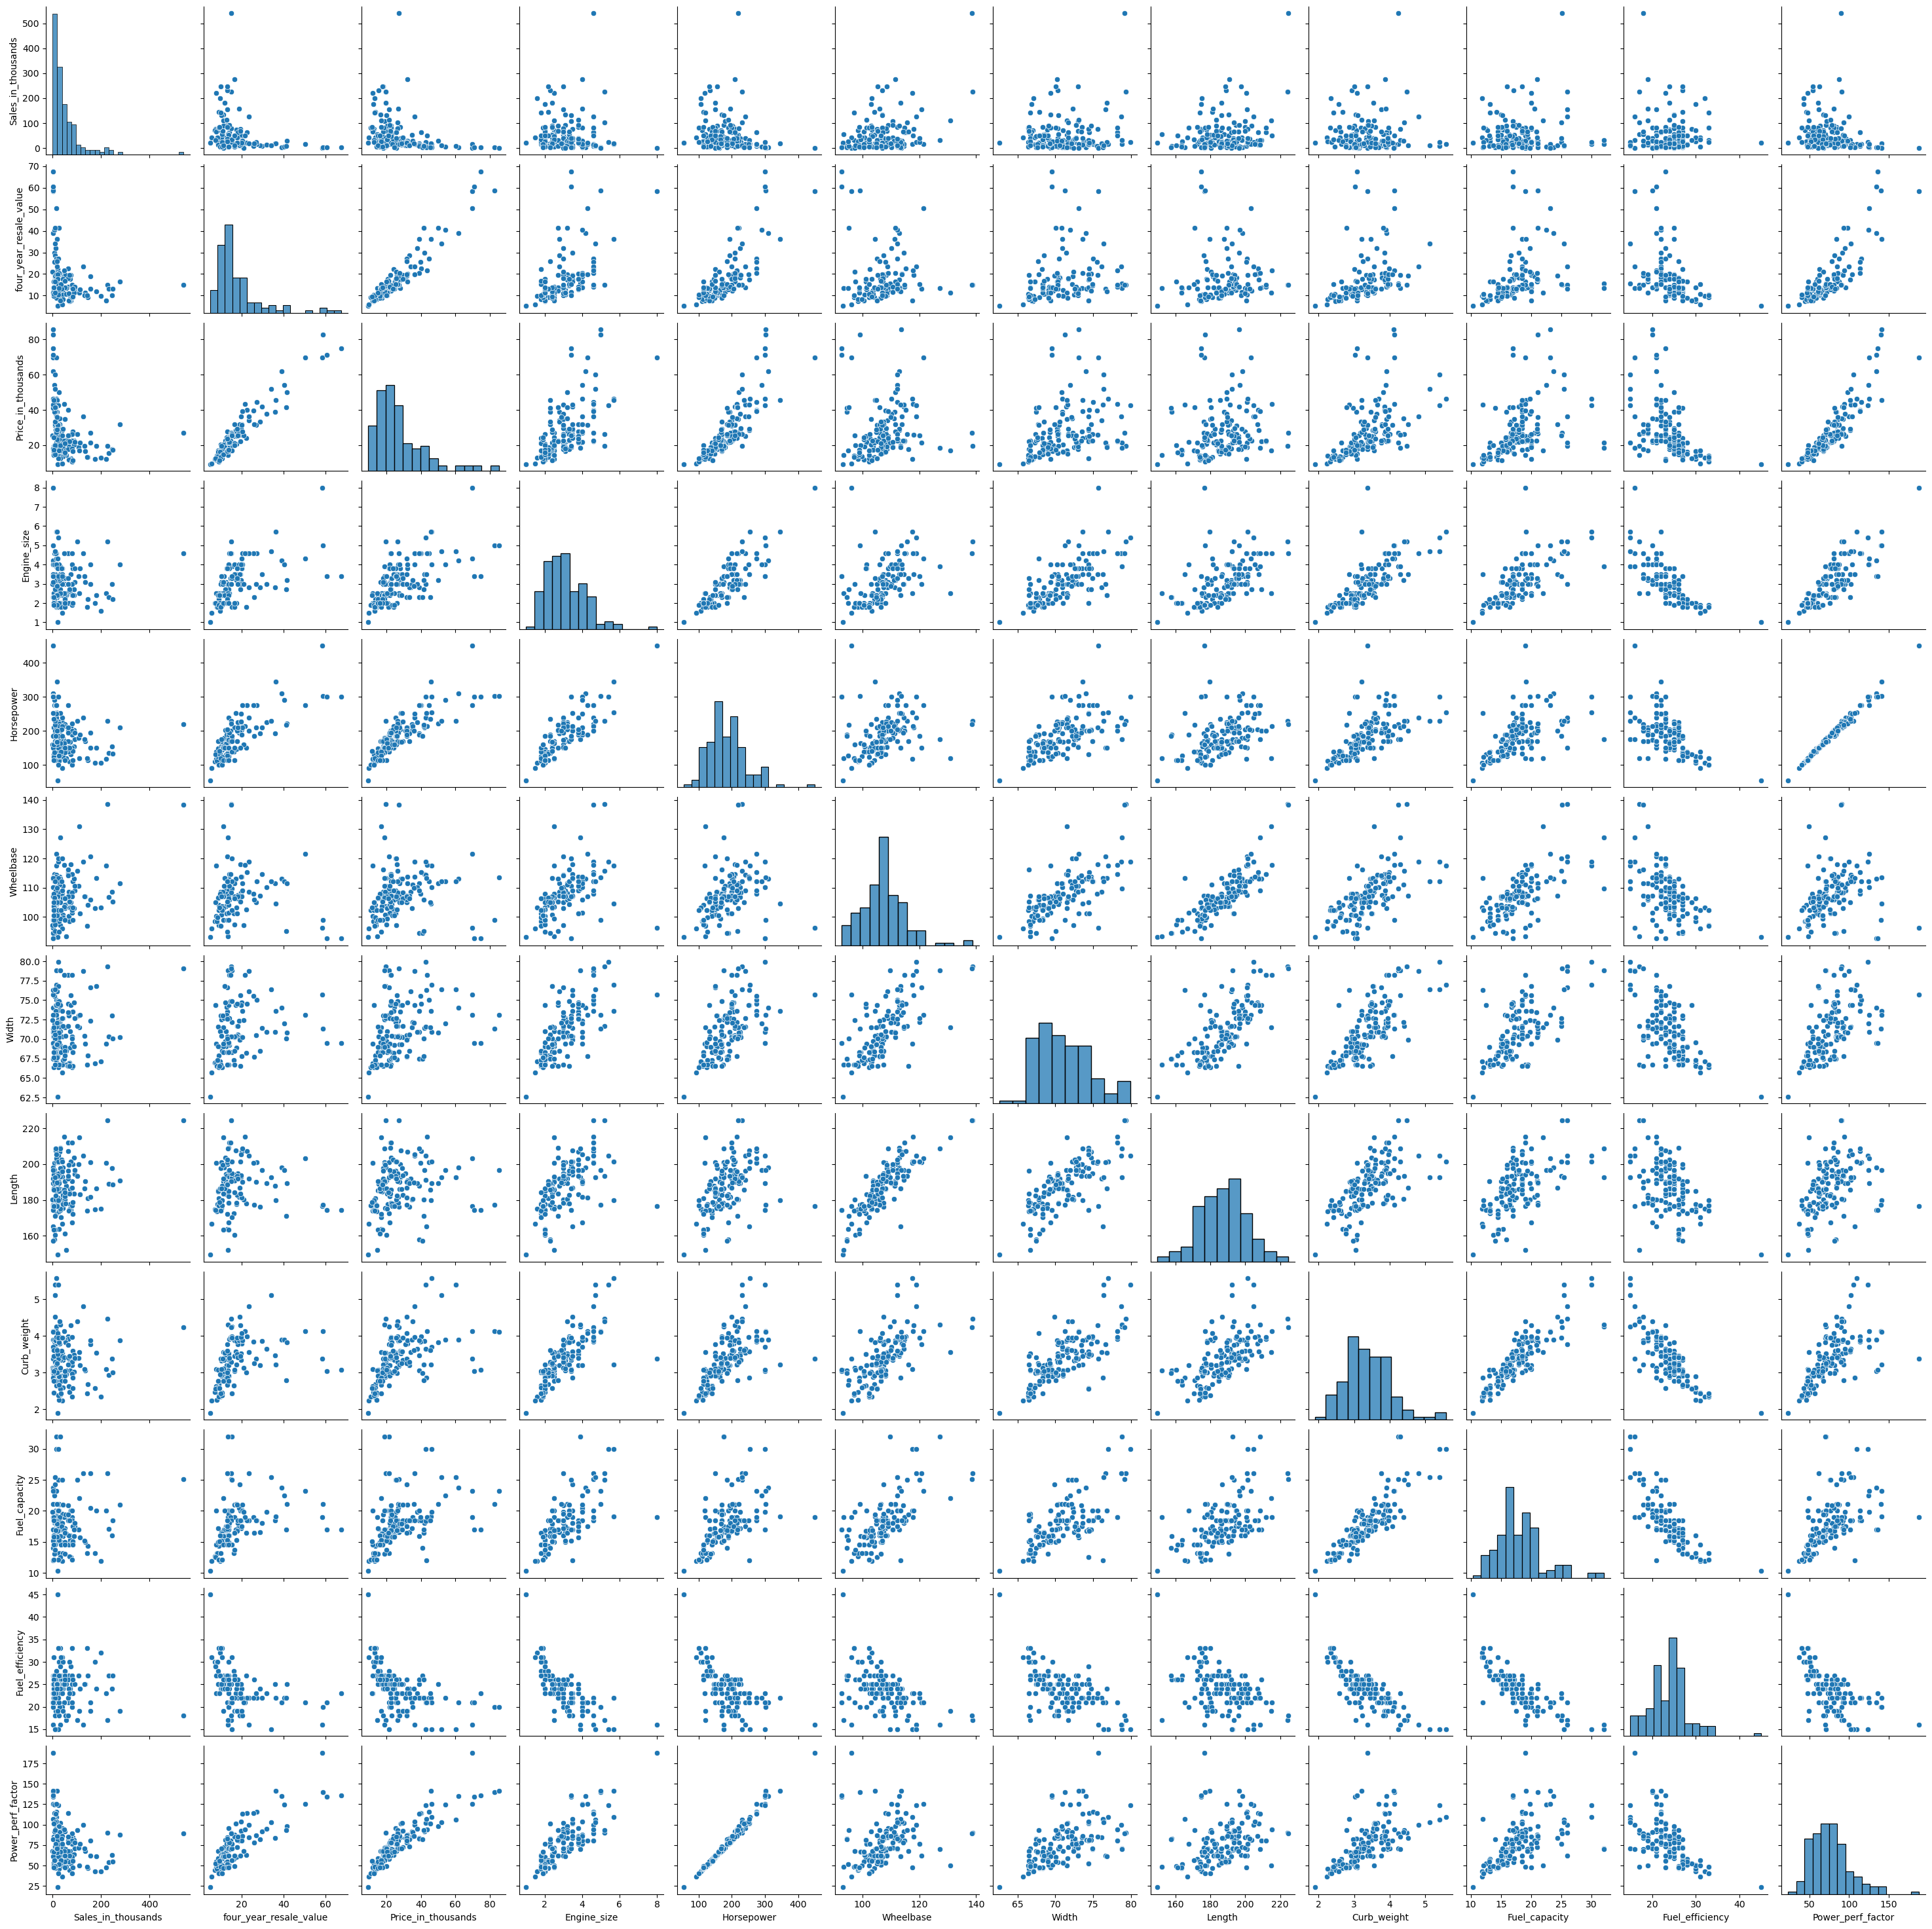

In [285]:
sns.pairplot(s)
plt.show()

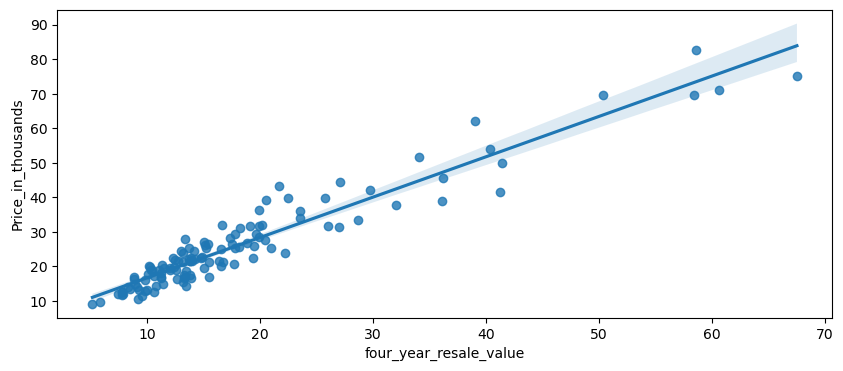

In [286]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x=df["four_year_resale_value"], y=df["Price_in_thousands"])
plt.show()

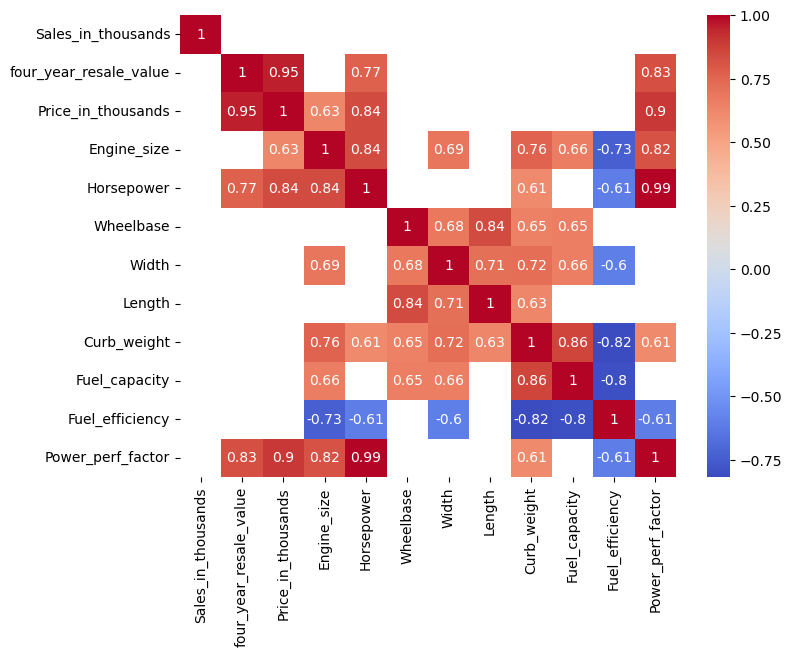

In [508]:
s1=s.corr()
s1=s1[abs(s1)>.6]
plt.figure(figsize=(8,6))
sns.heatmap(s1, annot=True, cmap='coolwarm')
plt.show() 

In [288]:
# Feature engineering - feature creation 
now=pd.to_datetime("now")
now

Timestamp('2024-09-10 13:50:46.130207')

In [289]:
df["age_car"]=(now.year- df["Latest_Launch"].dt.year)

In [290]:
df.drop(columns=["Latest_Launch"], inplace=True)

In [291]:
df.head()

,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,age_car
0,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,12
1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13
2,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,12
3,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,13
4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,13


In [292]:
# missing value treatemet

In [293]:
df.isnull().sum()

Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
age_car                    0
dtype: int64

In [294]:
# seperating numerical and object data
num_data=df.select_dtypes(exclude=["object"])
# num_data
cat_data=df.select_dtypes(include=["object"])
# cat_data

In [295]:
num_data=num_data.fillna(num_data.mean()) # filling/impute missing value by mean

In [296]:
num_data.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
age_car                   0
dtype: int64

In [297]:
num_data.shape

(157, 13)

#### Outlier treatment

In [299]:
num_data.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.937280,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,157.0,18.072975,10.045282,5.160000,6.736400,7.750000,7.801000,7.964000,8.425000,9.710000,12.545000,17.710000,18.140000,39.275000,41.040000,44.306000,57.498600,59.491000,67.550000
Price_in_thousands,157.0,27.390755,14.259359,9.235000,10.251160,11.560520,11.969680,12.128800,12.491000,13.976200,18.145000,23.400000,31.930000,55.225000,61.545200,69.708000,70.864600,78.327200,85.500000
Engine_size,157.0,3.060897,1.041299,1.000000,1.556000,1.800000,1.800000,1.800000,1.800000,1.960000,2.300000,3.000000,3.500000,4.760000,5.000000,5.200000,5.376000,5.700000,8.000000
Horsepower,157.0,185.948718,56.518297,55.000000,96.480000,100.720000,106.680000,110.720000,114.600000,120.000000,150.000000,180.000000,215.000000,300.000000,300.000000,300.640000,302.000000,325.400000,450.000000
Wheelbase,157.0,107.487179,7.616772,92.600000,92.880000,93.532000,94.500000,94.972000,95.920000,98.700000,103.000000,107.000000,112.200000,119.200000,120.000000,120.956000,126.516000,134.300000,138.700000
Width,157.0,71.150000,3.440790,62.600000,66.092000,66.400000,66.468000,66.500000,66.500000,66.900000,68.400000,70.600000,73.400000,78.200000,78.200000,78.732000,78.800000,79.188000,79.900000
Length,157.0,187.343590,13.388635,149.400000,154.968000,158.200000,160.876000,163.300000,163.700000,173.120000,177.600000,187.800000,196.100000,208.500000,208.956000,212.000000,214.640000,219.216000,224.500000
Curb_weight,157.0,3.378026,0.626447,1.895000,2.245600,2.332840,2.358040,2.403280,2.424000,2.612800,2.975000,3.368000,3.778000,4.388400,4.451760,4.612160,5.078160,5.396520,5.572000
Fuel_capacity,157.0,17.951923,3.875440,10.300000,11.900000,12.012000,12.100000,12.196000,12.500000,13.200000,15.800000,17.200000,19.500000,25.400000,25.856000,26.000000,29.520000,30.880000,32.000000


In [300]:
def outlier_percentile(x):
    x=x.clip(upper=x.quantile(.99))  # upperside outlier 
    # x=x.clip(lower=x.quantile(0.01))  # lowerside outlier
    return x

In [301]:
# num_data

In [302]:
a=num_data["Sales_in_thousands"].quantile(.99)

In [446]:
# np.where(num_data["Sales_in_thousands"]>=a,a, num_data["Sales_in_thousands"])  # upper side 

In [304]:
num_data1=num_data.apply(outlier_percentile)

In [305]:
# num_data1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.75,.95,.96,.97,.98,.99]).T

In [308]:
cleaned_data=pd.concat([cat_data, num_data1],axis=1)

### Dummy creation

In [463]:
cleaned_data1=pd.get_dummies(cleaned_data, columns=["Vehicle_type"], drop_first=True, dtype="int")

In [467]:
cleaned_data1.head(20) 

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,age_car,Vehicle_type_Passenger
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639000,13.2,28.0,58.280150,12,1
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517000,17.2,25.0,91.370778,13,1
2,14.114,18.225000,27.390755,3.2,225.0,106.9,70.6,192.0,3.470000,17.2,26.0,77.043591,12,1
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850000,18.0,22.0,91.389779,13,1
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998000,16.4,27.0,62.777639,13,1
5,18.780,23.555000,33.950000,2.8,200.0,108.7,76.1,192.0,3.561000,18.5,22.0,84.565105,13,1
6,1.380,39.000000,62.000000,4.2,310.0,113.0,74.0,198.2,3.902000,23.7,21.0,134.656858,12,1
7,19.747,18.072975,26.990000,2.5,170.0,107.3,68.4,176.0,3.179000,16.6,26.0,71.191207,13,1
8,9.231,28.675000,33.400000,2.8,193.0,107.3,68.5,176.0,3.197000,16.6,24.0,81.877069,12,1
9,17.527,36.125000,38.900000,2.8,193.0,111.4,70.9,188.0,3.472000,18.5,25.0,83.998724,13,1


In [471]:
# # Model Development 
# Statsmodel : ->
# sklearn : - 

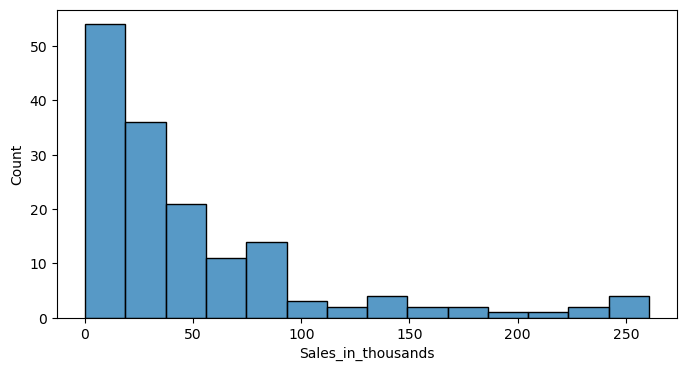

In [477]:
# normality
plt.figure(figsize=(8,4))
sns.histplot(data=cleaned_data1, x=cleaned_data1["Sales_in_thousands"])
plt.show()

In [ ]:
# # shapiro
# null hypo- Data is normal
# Alter hype- Data is not normal
# Confidence intervel -95% , alpha 5% (0..05)
# Test- shapiro
# decision - if p value >= Alpha then we select null hypothesis
#            if p value < alpha Value, then we reject null hypo

In [490]:
from scipy.stats import shapiro

In [492]:
shapiro(cleaned_data1["Sales_in_thousands"])

ShapiroResult(statistic=0.7552341117128591, pvalue=6.811491171418018e-15)

ShapiroResult(statistic=0.9831062855545168, pvalue=0.05210771586500871)


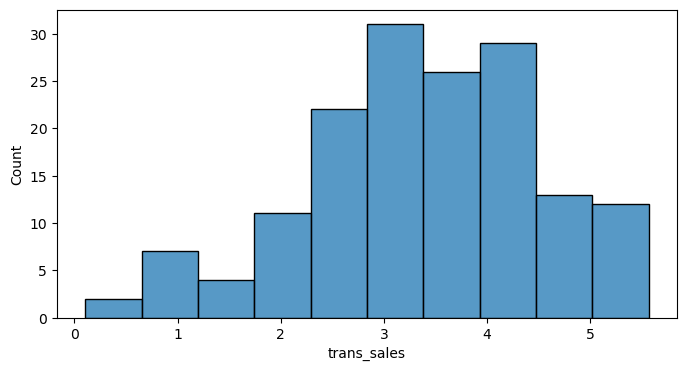

In [500]:
# Transformation
cleaned_data1["trans_sales"]=np.log1p(cleaned_data1["Sales_in_thousands"])
print(shapiro(cleaned_data1["trans_sales"]))
plt.figure(figsize=(8,4))
sns.histplot(data=cleaned_data1, x=cleaned_data1["trans_sales"])
plt.show()

In [511]:
cleaned_data1.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'age_car', 'Vehicle_type_Passenger', 'trans_sales'],
      dtype='object')

In [768]:
y=cleaned_data1["trans_sales"]
x=cleaned_data1[[
                # 'four_year_resale_value', 
                 'Price_in_thousands',
                 'Engine_size', 
                 # 'Horsepower', 
                 'Wheelbase', 
                 # 'Width',
                 # 'Length',
                 # 'Curb_weight',
                 # 'Fuel_capacity',
                 'Fuel_efficiency',
                 # 'Power_perf_factor',
                 # 'age_car',
                 'Vehicle_type_Passenger']]

In [770]:
from sklearn.model_selection import train_test_split  # for spliting the data
from sklearn import metrics  # for evaluation of model 
import statsmodels.api as sm  # for linear regression

In [772]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [774]:
# x_train.head(2)

In [776]:
x_train.shape

(109, 5)

In [778]:
x_test.shape

(48, 5)

In [780]:
# y=m1x1+m2x2+...+c

In [782]:
x_train1=sm.add_constant(x_train)
x_test1=sm.add_constant(x_test)

In [784]:
# x_train1.head(2)

In [786]:
109-13-1

95

In [788]:
model=sm.OLS( y_train, x_train1)  # ordinary least square method
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            trans_sales   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     19.93
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           7.50e-14
Time:                        15:45:39   Log-Likelihood:                -135.88
No. Observations:                 109   AIC:                             283.8
Df Residuals:                     103   BIC:                             299.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [790]:
x_train1.head(2)

,const,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Passenger
61,1.0,26.000000,3.5,118.1,23.0,0
2,1.0,27.390755,3.2,106.9,26.0,1


In [792]:
?np.log1p

Call signature:  np.log1p(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'log1p'>
File:            c:\users\hp\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:      
log1p(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Return the natural logarithm of one plus the input array, element-wise.

Calculates ``log(1 + x)``.

Parameters
----------
x : array_like
    Input values.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out

In [1]:
def(

SyntaxError: invalid syntax (1102136943.py, line 1)

In [3]:
import numpy as np

def gauss_forward_interpolation(x_values, y_values, x):
    n = len(x_values)
    h = x_values[1] - x_values[0]
    u = (x - x_values[0]) / h

    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_values

    for i in range(1, n):
        for j in range(n - i):
            diff_table[j, i] = diff_table[j + 1, i - 1] - diff_table[j, i - 1]

    result = y_values[0]
    u_term = 1
    for i in range(1, n):
        u_term *= (u - (i - 1)) / i
        result += u_term * diff_table[0, i]

    return result

x_vals = [1,2,3,4,5,6]
y_vals = [10,11,12,13,14,15]
x_to_find =3.5
print(gauss_forward_interpolation(x_vals, y_vals, x_to_find))


12.5


In [4]:
import pandas as pd

In [8]:
df = pd.read_excel(r"C:\Users\ohi_sheoran_shaab\Downloads\Bank.xlsx", sheet_name=1)

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [10]:
df.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [12]:
df.sum().isnull

<bound method Series.isnull of age                                                     460231
job          admin.admin.technicianservicesadmin.management...
marital      marriedmarriedmarriedmarriedmarriedsinglemarri...
education    secondarysecondarysecondarysecondarytertiaryte...
default      nonononononononononononononononononononononono...
balance                                               17061547
housing      yesnoyesyesnoyesyesyesyesyesyesyesyesyesyesyes...
loan         nononononoyesyesnononononoyesnonononononoyesno...
contact      unknownunknownunknownunknownunknownunknownunkn...
day                                                     174775
month        maymaymaymaymaymaymaymaymaymaymaymaymaymaymaym...
duration                                               4152195
campaign                                                 27999
pdays                                                   572950
previous                                                  9293
poutcome     unknownunkn

In [13]:
df.shape

(11162, 17)

In [14]:
df.describe

<bound method NDFrame.describe of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  cam

In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
